In [130]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
df_train = pd.read_csv('./house_prices/train.csv')
print(df_train.shape)
df_train.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [132]:
df_train.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [133]:
### Data Exploration
unique_ids = len(set(df_train.Id))
total_ids = df_train.shape[0]
dupl_ids = total_ids - unique_ids
print(dupl_ids)

0


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


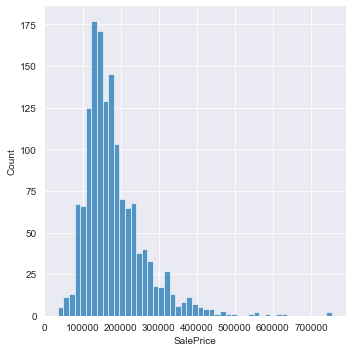

In [134]:
df_train.drop(['Id'], inplace=True, axis=1)
print(df_train['SalePrice'].describe())
sns.displot(df_train['SalePrice']);

In [135]:
print(sorted(list(df_train.columns)))

['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2', 'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation', 'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea', 'PoolQC', 'RoofMatl', 'RoofStyle', 'SaleCondition', 'SalePrice', 'SaleType', 'ScreenPorch', 'Street', 'Tot

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

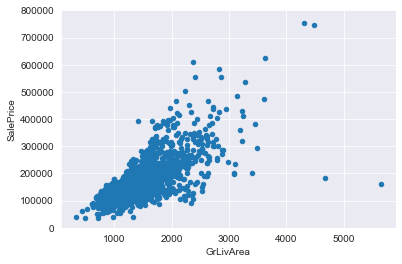

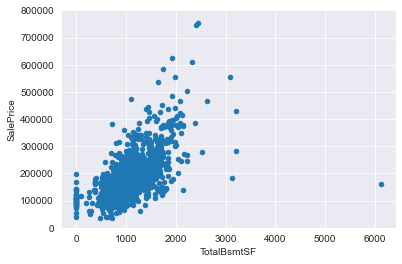

In [136]:
var = 'GrLivArea'
data = df_train[['SalePrice', var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))
var = 'TotalBsmtSF'
data = df_train[['SalePrice',var]]
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000))

(-0.5, 9.5, 0.0, 800000.0)

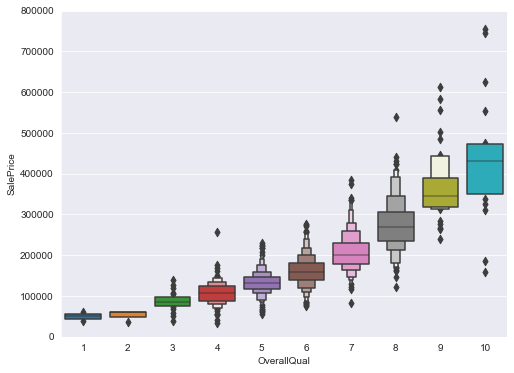

In [137]:
# overallqual
var = 'OverallQual'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

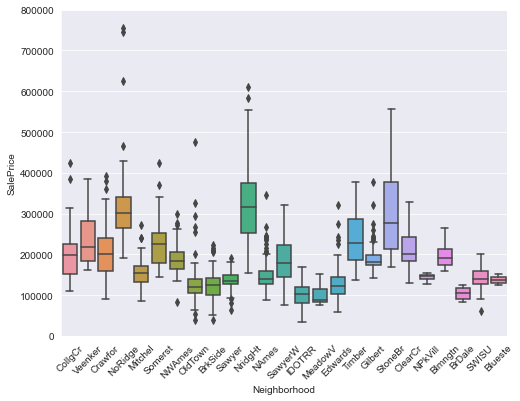

In [138]:
# Neighborhood
var = 'Neighborhood'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=45);

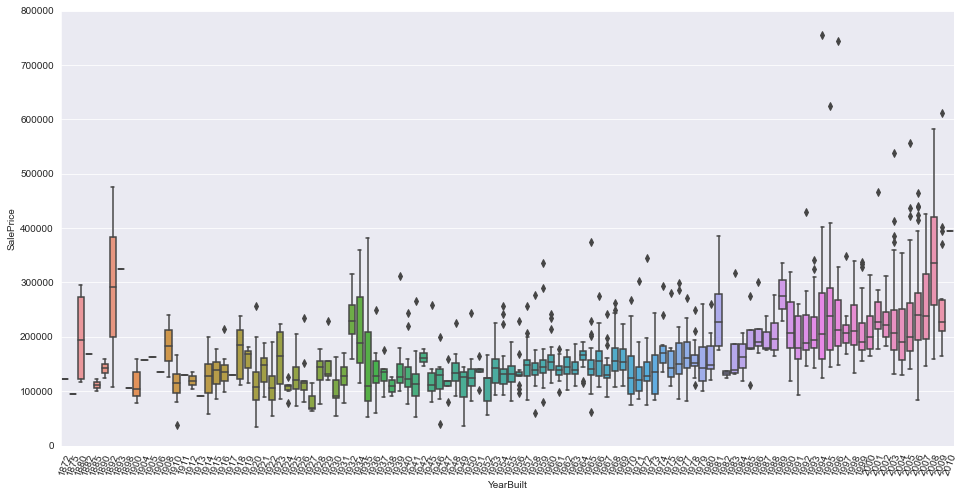

In [139]:
# YearBuilt
var = 'YearBuilt'
data = df_train[['SalePrice',var]]
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=70);

<AxesSubplot:>

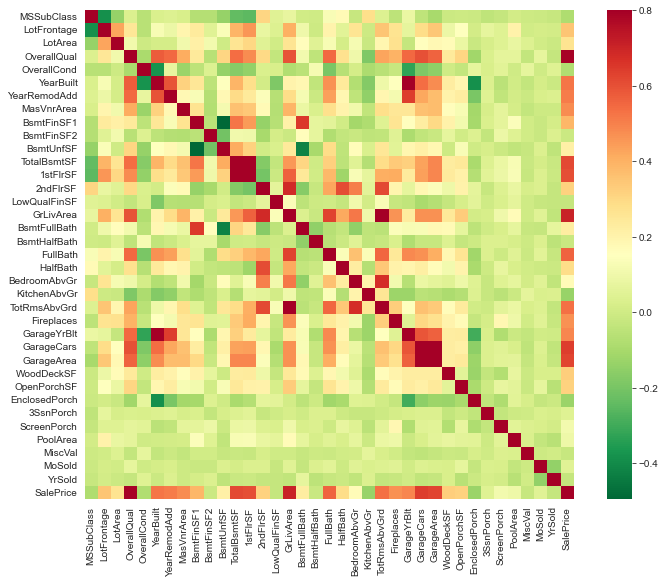

In [140]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True,cmap="RdYlGn_r")

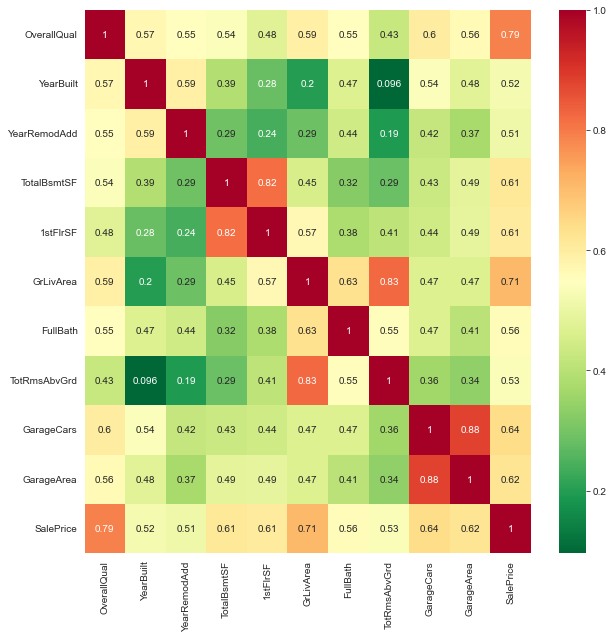

In [141]:
# most correlated features with SalePrice
corrmat = df_train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn_r")

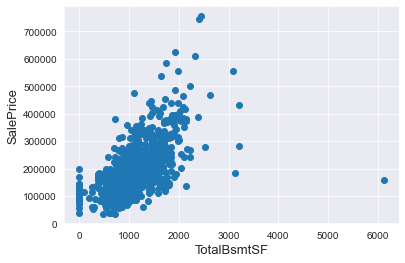

In [142]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['TotalBsmtSF'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

### Outliers Detection and Deletion

In [143]:
# delete outliers
df_train = df_train.drop(df_train[(df_train['TotalBsmtSF']>5000) & (df_train['SalePrice']<300000)].index)


In [144]:
# reset index
df_train = df_train.reset_index(drop=True)


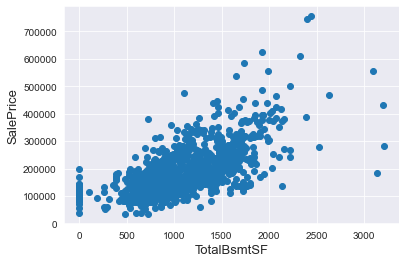

In [145]:
# check the graphic again
fig, ax = plt.subplots()
ax.scatter(df_train['TotalBsmtSF'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('TotalBsmtSF', fontsize=13)
plt.show()

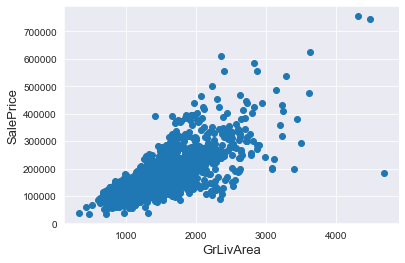

In [146]:
fig, ax = plt.subplots()
ax.scatter(x = df_train['GrLivArea'], y = df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()
df_train = df_train.drop(df_train[(df_train['GrLivArea']>4000) & (df_train['SalePrice']<300000)].index)
df_train = df_train.reset_index(drop=True)

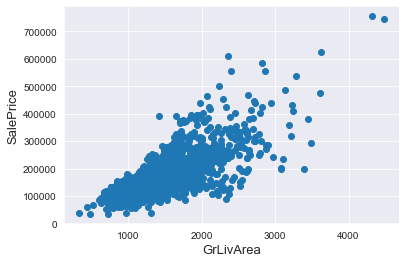

In [147]:
fig, ax = plt.subplots()
ax.scatter(df_train['GrLivArea'], df_train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

### Null Value Replacement

In [148]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1452,0.995885
MiscFeature,1404,0.962963
Alley,1367,0.937586
Fence,1177,0.807270
FireplaceQu,690,0.473251
LotFrontage,259,0.177641
GarageYrBlt,81,0.055556
GarageCond,81,0.055556
GarageType,81,0.055556
GarageFinish,81,0.055556


In [149]:
# drop 5 columns with the biggest ratio of null values
to_drop = missing_data.head(5).index.tolist()
df_train.drop(to_drop, axis=1, inplace=True)

In [150]:
# extract the names of columns with missing values
cols_with_missing = missing_data[missing_data.Percent > 0].index.tolist()
# remove column names that are already removed from dataset
missing_cols = list(set(cols_with_missing) - set(to_drop))
# check the datatype
df_train.dtypes[missing_cols]
num_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'float'].index.tolist()
# create new variable with the information that it was missing
for cl in num_cols_with_missing:
    df_train[cl + "_missing_ind"] = 0
    df_train.loc[df_train[cl].isnull(), cl + "_missing_ind"] = 1
# 1. for numerical variables:
df_train["LotFrontage"] = df_train["LotFrontage"].fillna(df_train["LotFrontage"].mean())
df_train["GarageYrBlt"] = df_train["GarageYrBlt"].fillna(df_train["GarageYrBlt"].min())
df_train["MasVnrArea"] = df_train["MasVnrArea"].fillna(0)

In [151]:
# 2. for categorical variables:
df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object']
cat_cols_with_missing = df_train.dtypes[missing_cols][df_train.dtypes[missing_cols] == 'object'].index.tolist()
# GarageFinish : data description says NA means "no garage"
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("None")
# GarageCond : data description says NA means "no garage"
df_train["GarageCond"] = df_train["GarageCond"].fillna("None")
# GarageQual : data description says NA means "no garage"
df_train["GarageQual"] = df_train["GarageQual"].fillna("None")
# GarageType : data description says NA means "no garage"
df_train["GarageType"] = df_train["GarageType"].fillna("None")

In [152]:
# BsmtExposure : data description says NA means "no basement"
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("None")
# BsmtFinType2 : data description says NA means "no basement"
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("None")
# BsmtFinType1 : data description says NA means "no basement"
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("None")
# BsmtCond : data description says NA means "no basement"
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("None")
# BsmtQual : data description says NA means "no basement"
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("None")
df_train["Electrical"] = df_train["Electrical"].fillna("Empty")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("Empty")

In [153]:
# missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
MSSubClass,0,0.0
BedroomAbvGr,0,0.0
GarageYrBlt,0,0.0
GarageType,0,0.0
Fireplaces,0,0.0
Functional,0,0.0
TotRmsAbvGrd,0,0.0
KitchenQual,0,0.0
KitchenAbvGr,0,0.0
HalfBath,0,0.0


### Value Transformation

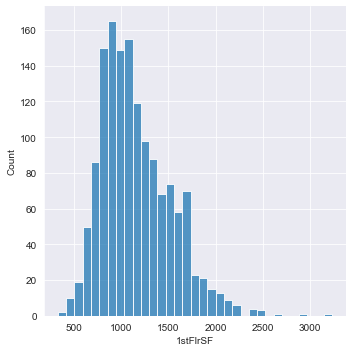

In [154]:
num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
sns.displot(df_train["1stFlrSF"])

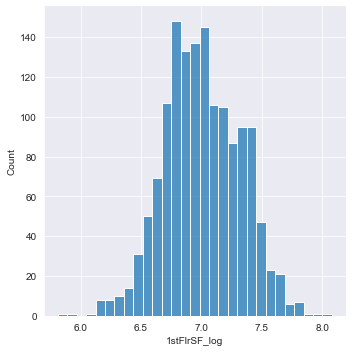

In [155]:
# log transformation
df_train["1stFlrSF_log"] = df_train["1stFlrSF"].apply(np.log)
sns.displot(df_train["1stFlrSF_log"])

## Scaling

In [156]:
# Scaling
from sklearn.preprocessing import StandardScaler
#
scaler = StandardScaler()
df_train_scaled = pd.DataFrame(scaler.fit_transform(df_train[num_feats+["1stFlrSF_log"]].astype(float)))
print(df_train_scaled.columns)
df_train_scaled.columns = num_feats+["1stFlrSF_log"]
print(df_train_scaled.columns)

RangeIndex(start=0, stop=41, step=1)
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'MasVnrArea_missing_ind',
       'LotFrontage_missing_ind', 'GarageYrBlt_missing_ind', '1stFlrSF_log'],
      dtype='object')


In [157]:
# lets map ORDINAL features
df_train = df_train.replace({"Alley" : {"Grvl" : 1, "Pave" : 2},
                             "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                             "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                               "ALQ" : 5, "GLQ" : 6},
                             "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4,
                                               "ALQ" : 5, "GLQ" : 6},
                             "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                             "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                             "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5,
                                             "Min2" : 6, "Min1" : 7, "Typ" : 8},
                             "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                             "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                             "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                             "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                             "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                             "Street" : {"Grvl" : 1, "Pave" : 2},
                             "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                            )

In [158]:
cat_feats = df_train.dtypes[df_train.dtypes == 'object'].index.tolist()
df_dummy = pd.get_dummies(df_train[cat_feats])

In [159]:
df_dummy.shape

(1458, 169)

## Feature Engineering

<AxesSubplot:xlabel='1stFlr_2ndFlr_SF', ylabel='SalePrice'>

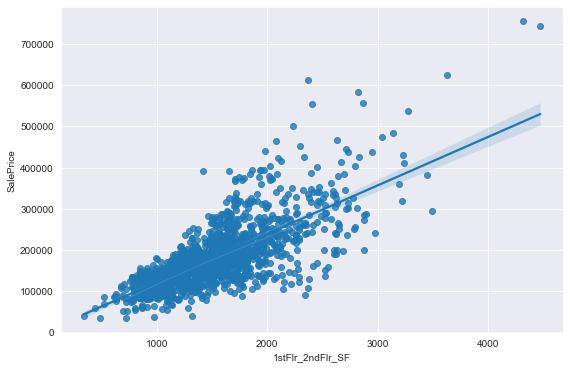

In [160]:
df_train['1stFlr_2ndFlr_SF'] = df_train['1stFlrSF'] + df_train['2ndFlrSF']

f, ax = plt.subplots(figsize=(9, 6))
# seaborn's regression plot
sns.regplot(x=(df_train['1stFlr_2ndFlr_SF']), y=df_train['SalePrice'], data=df_train, order=1)

In [161]:
# overall quality of a house
df_train["OverallGrade"] = df_train["OverallQual"] * df_train["OverallCond"]
# f, ax = plt.subplots(figsize=(9, 6))
# sns.regplot(x=(df_train['OverallGrade']), y=df_train['SalePrice'], data=df_train, order=1)

##### Do you have any more ideas for new features? Try to come up with some extra.

- Tips: The total square footage of everything, the overall quality of exterior, the total number of bathrooms, the square footage of the porch.

### Simplification of Existing Features

(-0.5, 5.5, 0.0, 800000.0)

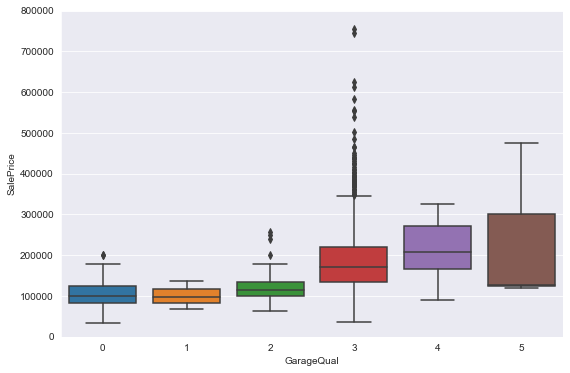

In [162]:
var = 'GarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [163]:
df_train.GarageQual.value_counts(ascending=False)

3    1309
0      81
2      48
4      14
5       3
1       3
Name: GarageQual, dtype: int64

In [164]:
df_train["SimplGarageQual"] = df_train.GarageQual.replace({0: 1, # bad
                                                           1: 1, 2: 1,# bad
                                                           3 : 2, # average
                                                           4 : 3, 5 : 3 # good
                                                           })

In [165]:
df_train.SimplGarageQual.value_counts()

2    1309
1     132
3      17
Name: SimplGarageQual, dtype: int64

(-0.5, 2.5, 0.0, 800000.0)

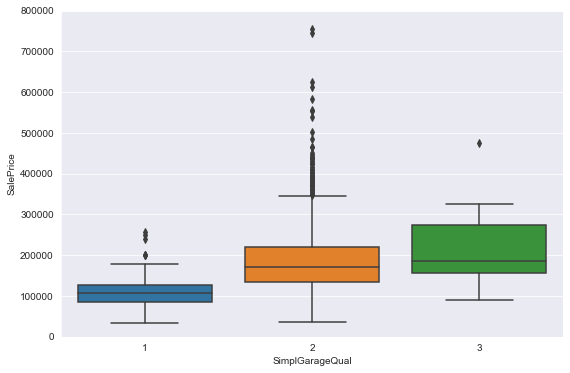

In [166]:
var = 'SimplGarageQual'
f, ax = plt.subplots(figsize=(9, 6))
data = df_train[['SalePrice',var]]
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000)

In [170]:
# all numeric features
final_num_feats = df_train.dtypes[df_train.dtypes != 'object'].index.tolist()
df_numeric = df_train[final_num_feats]